In [22]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


This block gathers gets the data into a usable format and seperates train and test data.
Also normalizes the data.

In [31]:
df = pd.read_csv('../data.csv')
npArr = df.to_numpy()
npArr = npArr
id = npArr[:,0]
results = npArr[:,1]
npArr = npArr[:,2:32]
precentTrain = 0.8
trainSamples = int(np.floor(np.shape(npArr)[0] * precentTrain))
trainData = npArr[:trainSamples,:]
trainResults = results[:trainSamples]
trainResults= trainResults == 'M'
trainResults = trainResults * 1
testData = npArr[trainSamples:,:]
testResults = results[trainSamples:]
testResults = testResults == 'M'
testResults = testResults * 1
normalizationScaler = preprocessing.StandardScaler().fit(trainData)
trainData = normalizationScaler.transform(trainData)
normalizationScaler = preprocessing.StandardScaler().fit(testData)
testData = normalizationScaler.transform(testData)


This block will run PCA on the training and test data 

In [32]:
pca = PCA(svd_solver='full', copy=False)
pca.fit(trainData, trainResults) # train results is ignored.
# print(pca.explained_variance_ratio_) # percentage of variance explained be each component
# print(pca.singular_values_) # Singular values corresponding to each of teh selected components
print("The eigen values of the data is \n", pca.explained_variance_) # eigen values of the data.
# print(pca.components_) # Eigen Vectors

The eigen values of the data is 
 [1.34185392e+01 5.64046818e+00 2.96541397e+00 1.79726323e+00
 1.66018802e+00 1.18471800e+00 6.72563056e-01 4.68169183e-01
 4.19865590e-01 3.47916113e-01 3.15488007e-01 2.78534087e-01
 2.38761209e-01 1.57118007e-01 9.47407848e-02 7.96349865e-02
 6.23444657e-02 5.54679634e-02 4.53945510e-02 3.30048238e-02
 2.96238238e-02 2.77975879e-02 2.09208325e-02 1.88132397e-02
 1.61293557e-02 7.88857662e-03 6.74437196e-03 1.61084862e-03
 8.22289078e-04 1.34948867e-04]


Kept  7  features
(455, 30)
(114, 30)


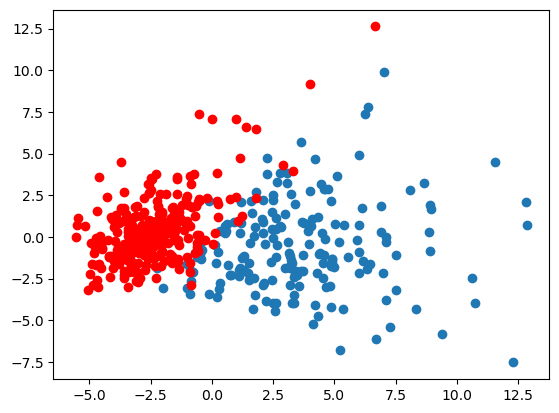

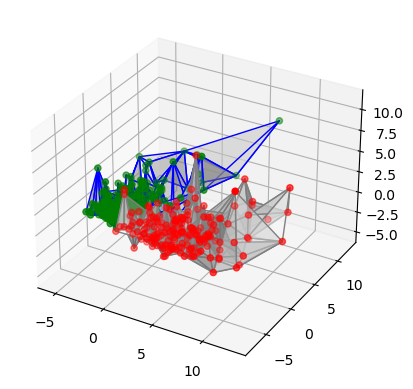

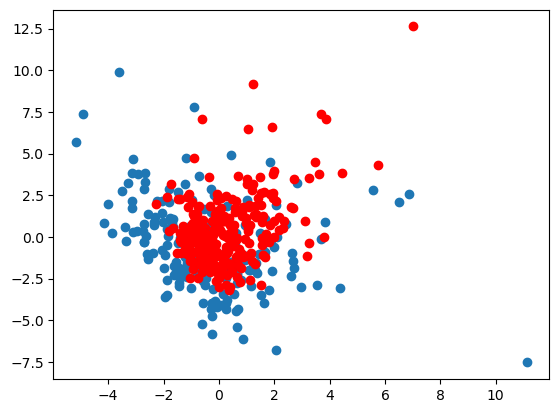

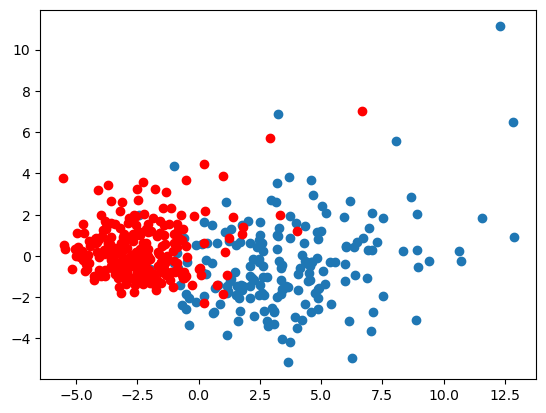

In [33]:
minEigenValue = pca.explained_variance_[0] * 0.05 # Keeps top 95% of variances
componentsKept = len(pca.explained_variance_[pca.explained_variance_ > minEigenValue])
print("Kept ", componentsKept, " features")
components = 5
pcaTrain = PCA(n_components=components) # Creates a new pca to reduce feature set to only features with eigen values above minEigenValue
pcaTrainData = pcaTrain.fit(trainData, trainResults).transform(trainData) # Train results is ignored
pcaTestData = pcaTrain.transform(testData)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(pcaTrainData[trainResults==1][:,0], pcaTrainData[trainResults==1][:,1])
ax3.scatter(pcaTrainData[trainResults==0][:,0], pcaTrainData[trainResults==0][:,1],c="red")
if components > 2:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(pcaTrainData[trainResults==1][:,0],pcaTrainData[trainResults==1][:,1],pcaTrainData[trainResults==1][:,2],edgecolors='grey',color='white',alpha=0.5)
    ax.plot_trisurf(pcaTrainData[trainResults==0][:,0],pcaTrainData[trainResults==0][:,1],pcaTrainData[trainResults==0][:,2],edgecolors='blue',color='white',alpha=0.5)
    ax.scatter(pcaTrainData[trainResults==1][:,0],pcaTrainData[trainResults==1][:,1],pcaTrainData[trainResults==1][:,2],c='red')
    ax.scatter(pcaTrainData[trainResults==0][:,0],pcaTrainData[trainResults==0][:,1],pcaTrainData[trainResults==0][:,2],c='green')
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    ax1.scatter(pcaTrainData[trainResults==1][:,2], pcaTrainData[trainResults==1][:,1])
    ax1.scatter(pcaTrainData[trainResults==0][:,2], pcaTrainData[trainResults==0][:,1],c="red")
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.scatter(pcaTrainData[trainResults==1][:,0], pcaTrainData[trainResults==1][:,2])
    ax2.scatter(pcaTrainData[trainResults==0][:,0], pcaTrainData[trainResults==0][:,2],c="red")

# 

print(np.shape(trainData))
print(np.shape(testData))

Block will implement linear regression.

In [43]:
reg = LinearRegression().fit(pcaTrainData, trainResults)
predictTrain = reg.predict(pcaTrainData)
bestRmse = 1
bestI = 0
for i in range(300, 700):
    predictTrainTest = predictTrain > (i / 1000)
    predictTrainTest = predictTrainTest * 1
    rmse = (mean_squared_error(trainResults, predictTrainTest))
    if rmse < bestRmse:
        bestRmse = rmse
        bestI = i


print(bestI)
print(bestRmse)
threshold = bestI / 1000
predict = reg.predict(pcaTestData)
results = predict > threshold
results = results * 1
print(results == testResults)
print(mean_squared_error(testResults, results))







403
0.026373626373626374
[False False  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True False
  True  True  True  True  True  True  True  True  True  True False  True
  True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True]
0.10526315789473684
